## ALY 6020 Module 6 Final Project
Syed Faizan\
Under the supervision of\
Dr.Harpreet Sharma.PhD.


# Import necessary libraries

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
churn_data = pd.read_csv(r"C:\Users\sfaiz\OneDrive\Desktop\ALY 6020 Final Exam\Churn_Modelling.csv")


# Display the first few rows and basic info to understand structure
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
churn_data.shape

(10000, 14)

In [8]:
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
churn_data.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

# Data Cleansing

**Step 1: Check for missing values**

In [9]:

missing_values = churn_data.isnull().sum()
missing_values






RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Step 2: Drop irrelevant columns**

In [10]:

churn_cleaned = churn_data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

**Step 3: Encode categorical variables**

In [11]:


churn_cleaned = pd.get_dummies(churn_cleaned, columns=['Geography', 'Gender'], drop_first=True)

**Step 4: Check for duplicates and remove them if present**

In [13]:

duplicates = churn_cleaned.duplicated().sum()
churn_cleaned = churn_cleaned.drop_duplicates()


**Step 5: Display basic information and check for changes**

In [14]:

cleaned_summary = {
    'Missing Values': missing_values.sum(),
    'Duplicate Rows': duplicates,
    'Shape Before': churn_data.shape,
    'Shape After': churn_cleaned.shape
}

cleaned_summary

{'Missing Values': 0,
 'Duplicate Rows': 0,
 'Shape Before': (10000, 14),
 'Shape After': (10000, 12)}

In [15]:
churn_cleaned.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


C:\Users\sfaiz\AppData\Local\Temp\ipykernel_276668\3684233931.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=churn_cleaned, palette='viridis')


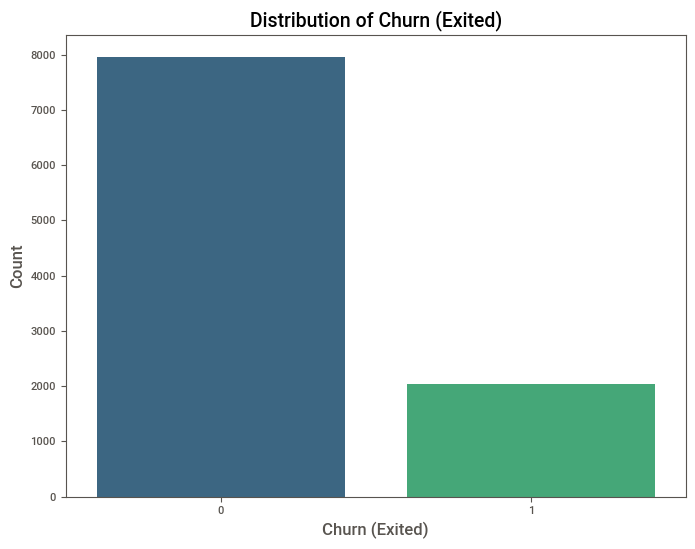

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (Exited)
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=churn_cleaned, palette='viridis')
plt.title('Distribution of Churn (Exited)', fontsize=14)
plt.xlabel('Churn (Exited)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()




In [17]:
churn_cleaned.describe

<bound method NDFrame.describe of       CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1

# Automated EDA 

In [19]:
from summarytools import dfSummary
dfSummary(churn_cleaned)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CreditScore[int64],Mean (sd) : 650.5 (96.7)min < med < max:350.0 < 652.0 < 850.0IQR (CV) : 134.0 (6.7),460 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkklEQVR4nO3cMY7aQBSA4TdhQQYkWwgJOi4QaQtKDpHD5ggpKFJzAzoEsoxw1sIYb5EUG2nDxp6ZZZ75v3oNU/zCa+vNmLquBQjdl3svAPgfT/deAP5mjBmKyMDiI851Xb+4Wk8oCDUgxpjhdDr9FsfxpO1nHI/H1BjzvWuxEmpYBnEcT1ar1UuSJEXTi7Msi9br9eRwOAxEhFBxm8XtO75er/0kSdLZbPar5dcPW14XNEJ1zOb2XZZlVFXV16IofohI21A7iVDda3373m63k81mM7pcLj1fi9OKUD1JkqRoevtO07STt20XeI8KFQgVKhAqVCBUqECoUIFQoQKhQgVChQq88O+Yqqr6IhIbY9pcHuyIIKF2SJ7n/bIsnxeLRa/X6zWevgp5RJBQO+R8Pj9FUTRaLpfFfD5Pm1wb+oggof6D7aie6/U0MR6PG88Z/BHsrAGhvoNRvfAQ6vsY1QsMod7AqF44eI8KFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjQ2aEUy5Ob7z5Teg+W21hEPG5l6WSotic3P+JMqe02FhG/W1k6GapYntz8iDOlNttYRPxvZelqqCLSbp5U5LFnSi22sYh43MrCwxRUIFSoQKhQgVChAqFCBUKFCoQKFTr9HhWfy+dJgoQKJ3yfJEiocML3SYKECqd8nSTIwxRUIFSoQKhQIej/UTWf+gy3gg2VU5/xVrChCqc+442QQxURTn3GbzxMQQVChQqEChUIFSoQKlTw+tTPsTpwxVuoHKsDl3z+onKsDpzx/sKfY3XgAg9TUOHDX1QmmBCCm6G6mGDa7/c/2yzsdDpFIiJ5nke73W70Wdfe87u1rtv2+izLoo/+5hUeHIwMNeBfZAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[int64],Mean (sd) : 38.9 (10.5)min < med < max:18.0 < 37.0 < 92.0IQR (CV) : 12.0 (3.7),70 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmElEQVR4nO3cMY7aQBSA4TdhIQYiG0QCHS1FpBSUHCKHzRGCREvDDeiQDDKC4MUYp0oqloWxvcwz/9cPO8W/XgZ2nsmyTADXfXr0BoBbvDx6A9cYY5oi0rBcfsyy7FDkfvA4zoZqjGn2er2fvu93bdZvt9uNMeYXsVaDs6GKSMP3/e5kMjkEQRDfszCKIm82m3XDMGyICKFWgMuhiohIEARxv9//Y7G0Wfhm8DAcpqACoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhQ6r3+nCN5/PP5XC9yP9CrtFDzjuRJksRL0/R7HMe/RcRmAAUqpMwnqvVIHhGR5XLZXSwWrdPpVCtjc9Cl9JE+tiN5NpsNI3nwH4cpqECoUMH5aX620jSti4hvjLF9CQYBO6SSoe73+3qSJD+Gw2GtVqvdfZATYRCwayoZ6vF4fPE8rzUej+PBYLC5dz2DgN1TyVD/abfbtkOARRgE7BQOU1CBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVKj0/6PmkfMqC9dYCkaoF+S9ysI1luIR6gV5rrJwjaUchHpFjqssXGMp2Luh5hh0xpAzFOZqqHkGnT3zkDMOYsV774lqPejsWYeccRArx03vUW0GnT3rkDMOYuXgMFUSDmLF4pspqECoUIE//Y5hCuFlhOoQphC+jVAdUsQUwul02g/D8KsxZmuzBVcDJ1QH2X5iUOXPcG8KNYoi794X3u12nojIfr/3VqtV6yPXa/3Zefe9Xq+/eJ7XGo1GptPpvN6z9nA4fJ7P599yPI3zes2y7M1frr/IW2BxTUHecwAAAABJRU5ErkJggg=="">",0(0.0%)
3,Tenure[int64],Mean (sd) : 5.0 (2.9)min < med < max:0.0 < 5.0 < 10.0IQR (CV) : 4.0 (1.7),11 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC3ElEQVR4nO3cv08aYRzH8e8D/jiE3gWluLF0NOlA4sLSrWP/2K7dNNGks0OXTi7GhJxHuEo4gQ6tiYvAPY8nfvD9WsnXu+Cbh0B4HrdYLAx462qbvgFgHTubvgFsD+dcw8z2PMeni8Xi/rkHCRUvwjnXODo6+hbHcdtnfjQapc6578/FSqh4KXtxHLcHg8F9kiSTMoNZlkUXFxft4XC4Z2aEiuolSTLpdrt/PEYbyx7kwxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokVPrD6cA9NGb/Xkhzz9mle3CgpbJQQ/fQzGaz3TzPP7Vard+1Wq0oO393dzd2zv0ws1LbIp7wDr3KTW4VXztkYYjn8/mu5+xKVa6o3ntozMyur6/bV1dXH/v9/q/j4+O0zOzNzc2Hy8vLL71er1Ov171CDQg9Ojw8/JokSdPnuqs2uS0TsjiELgxFUUSz2exkMpmcmZnPVpSlKt8z5buHJk3ThplZs9ksPZ+maSOKooN+vz8pG7lZWOhFUURmdnJ6evqz0+mMysxmWRadn593h8NhxzlXava/uNVqdQeDwajs4hCyMDyZP3h4eKiXnV3HVm/u84ncLCz0x39YFEVF2Wvneb5bFMXnXq9X93kneFzV9vf3z3xe3GZhz1nZmTK2OtRQvqu57/Wm0+lOyDtB1avaJhHqG/RWV7VN4ntUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSFi5CzXgiJhKj3jB+7I01JAjYqo+4gXvy6oV1fv8qG0+DAGvb60DKHzOj9rmwxDw+vgwBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECglr/R41y7Ko7B8ej8eRmVme59Ht7e3Ba86rXlv1vkPn1+nrLxTKXhzm/oaoAAAAAElFTkSuQmCC"">",0(0.0%)
4,Balance[float64],Mean (sd) : 76485.9 (62397.4)min < med < max:0.0 < 97198.5 < 250898.1IQR (CV) : 127644.2 (1.

In [21]:
import sweetviz as sv


my_report = sv.analyze(churn_cleaned)

# Generate the report and save it as an HTML file
my_report.show_html("churn.html")
from IPython.display import IFrame

# Display the HTML report in the notebook
IFrame(src='churn.html', width=1050, height=700)



                                             |          | [  0%]   00:00 -> (? left)

Report churn.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [48]:
churn_cleaned.columns.to_list()

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

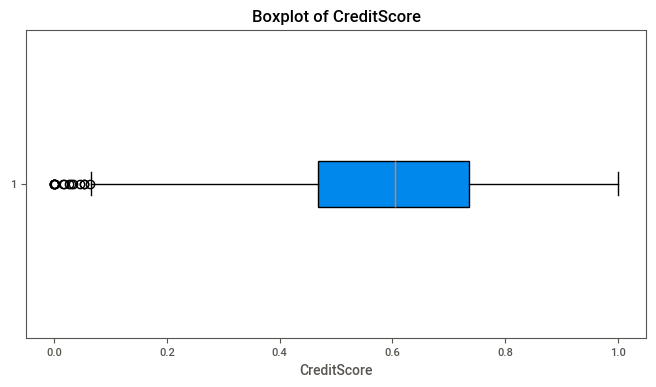

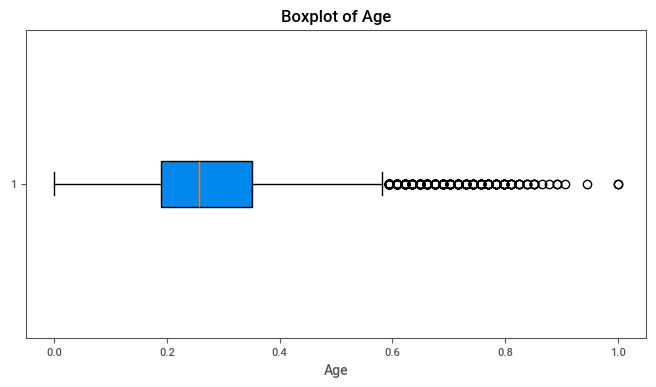

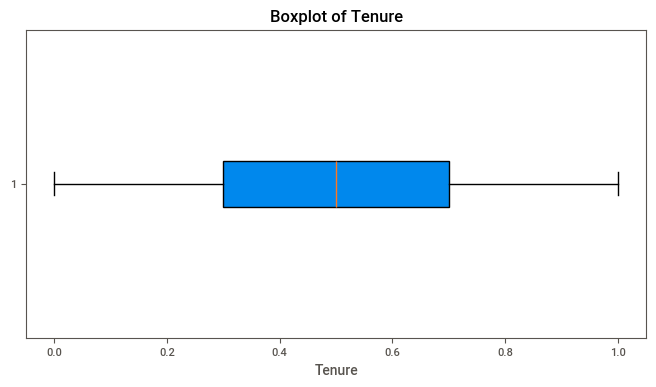

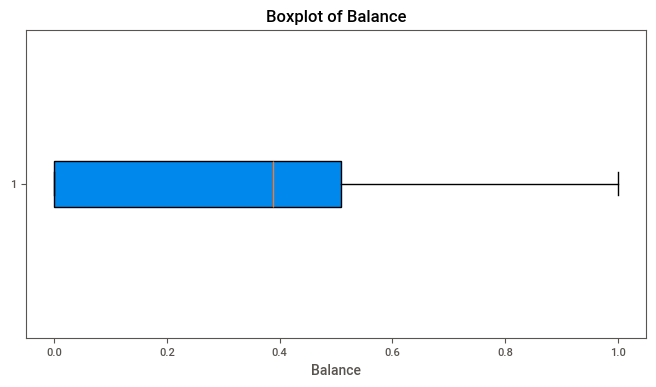

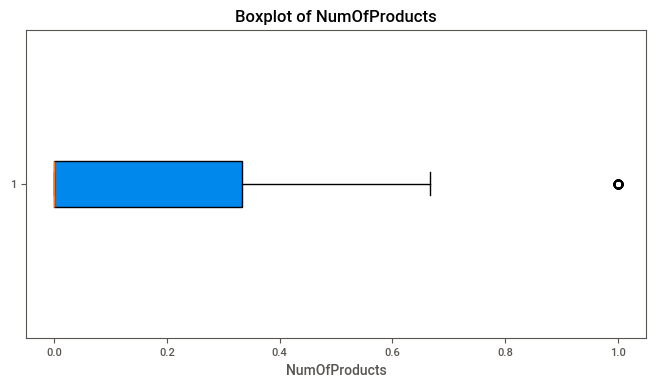

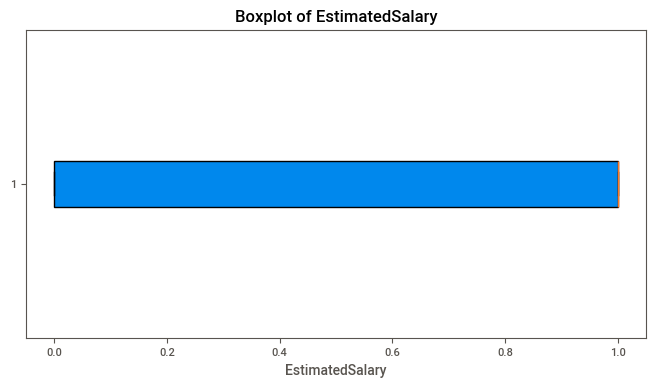

In [50]:

columns = churn_cleaned.drop(columns=['HasCrCard',
 'IsActiveMember',
 'Exited',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']).columns  # Exclude target and categorical columns

# Plot boxplots for each column
for i, column in enumerate(columns):
    plt.figure(figsize=(8, 4))
    plt.boxplot(X_scaled[:, i], vert=False, patch_artist=True)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


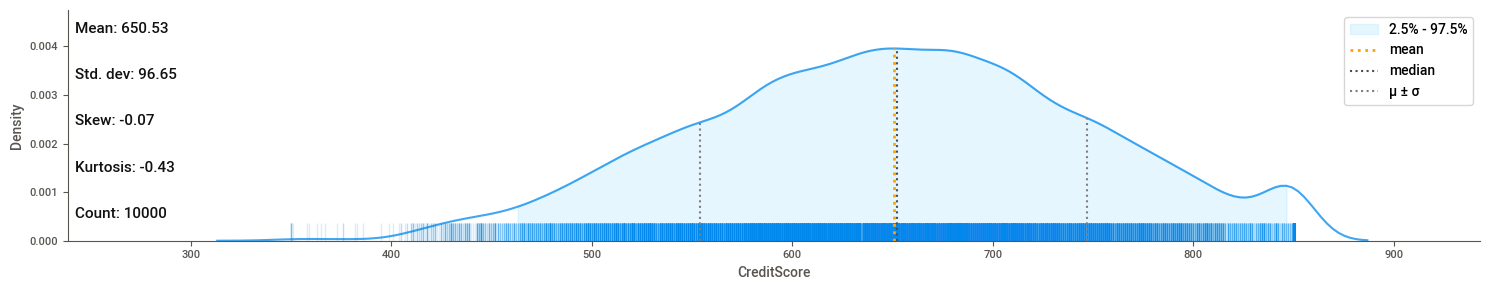

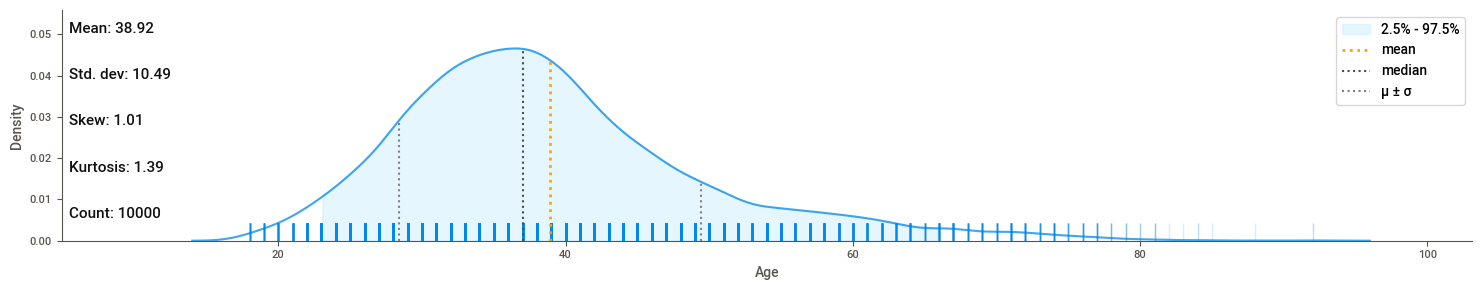

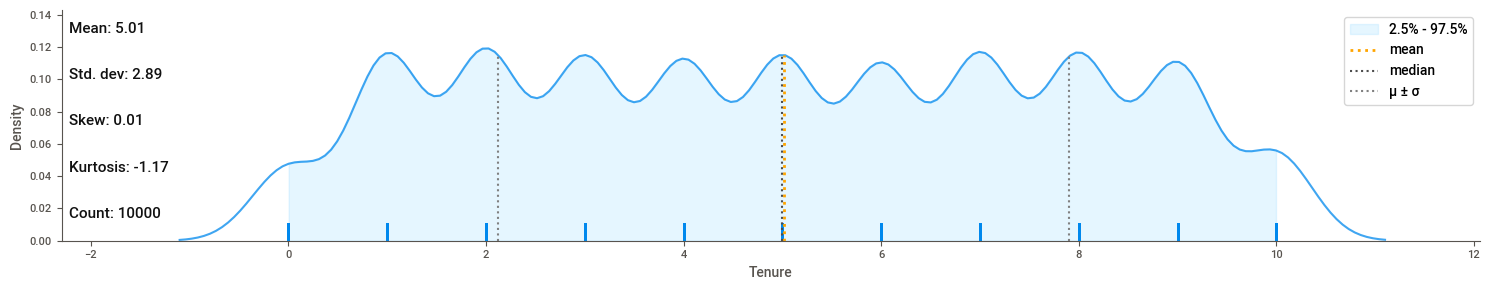

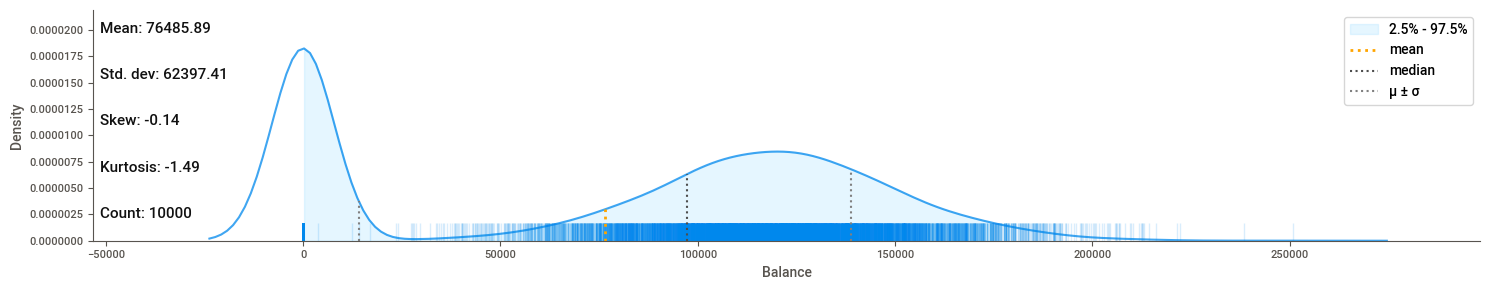

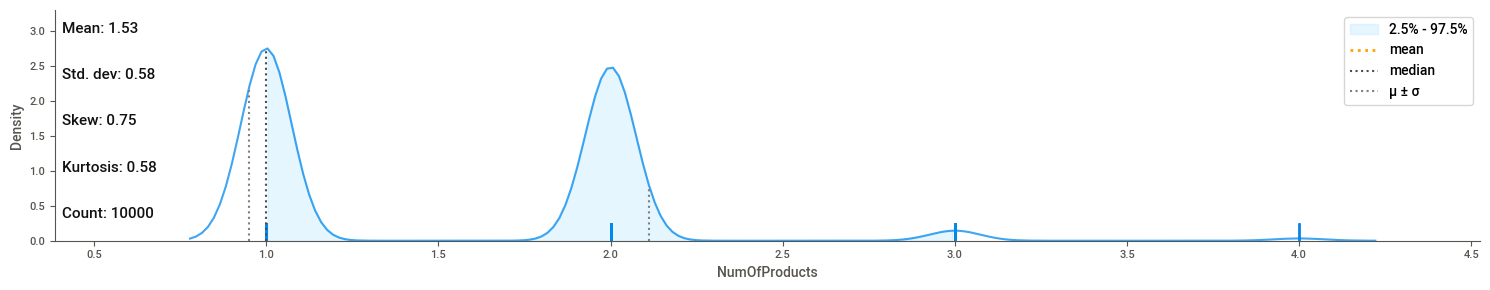

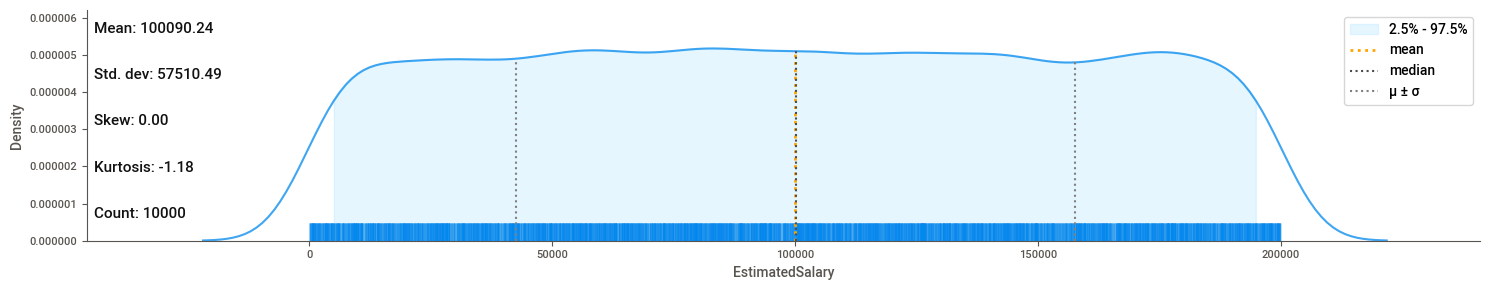

In [56]:
import klib


# Use klib.dist_plot for each numerical feature
for column in columns:
    klib.dist_plot(churn_cleaned[column])

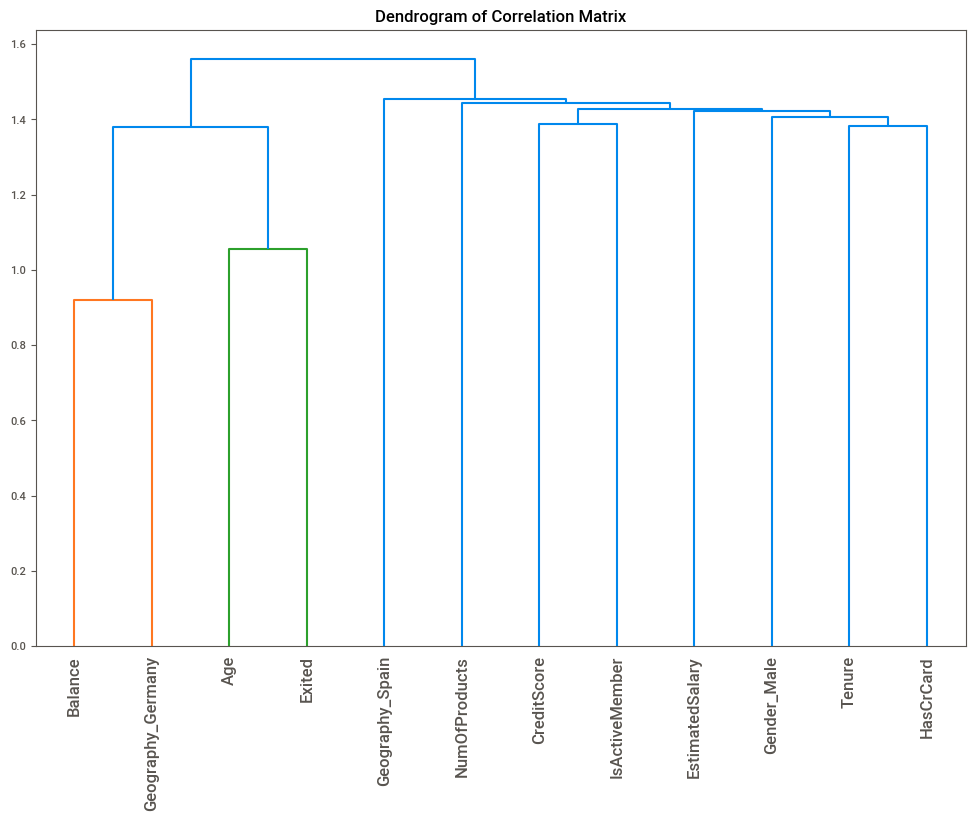

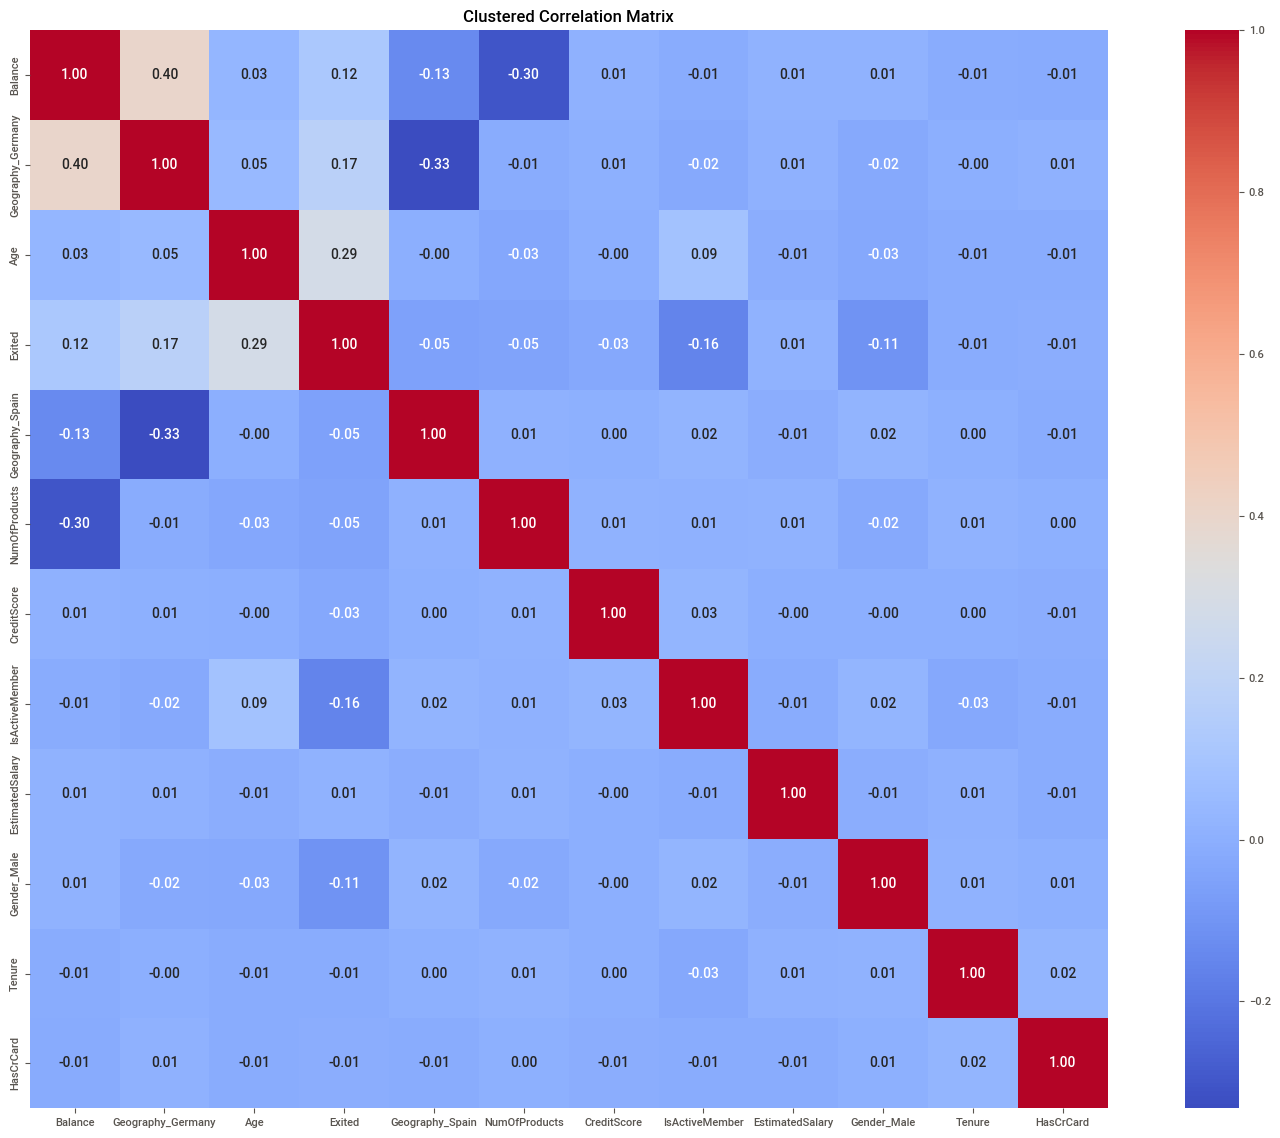

In [58]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute the correlation matrix for all features in df1
correlation_matrix = churn_cleaned.corr()

# Compute linkage for clustering
linkage_matrix = linkage(correlation_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title("Dendrogram of Correlation Matrix")
plt.show()

# Reorder correlation matrix based on clustering
ordered_indices = dendrogram(linkage_matrix, no_plot=True)['leaves']
reordered_corr = correlation_matrix.iloc[ordered_indices, ordered_indices]

# Plot the reordered heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(reordered_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Clustered Correlation Matrix")
plt.show()

In [59]:

# Separate features and target variable
X = churn_cleaned.drop(columns='Exited')
y = churn_cleaned['Exited']

# Normalize the feature data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
import time
# Find the optimal value of K
k_range = range(1, 31)
cv_scores = []

# Timing the cross-validation process
start_time = time.time()

# Perform cross-validation for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

elapsed_time = time.time() - start_time
elapsed_time



14.198328256607056

In [24]:
# Determine the optimal value of K
optimal_k = k_range[np.argmax(cv_scores)]
optimal_accuracy = max(cv_scores)

optimal_k, optimal_accuracy

(9, 0.8161249999999999)

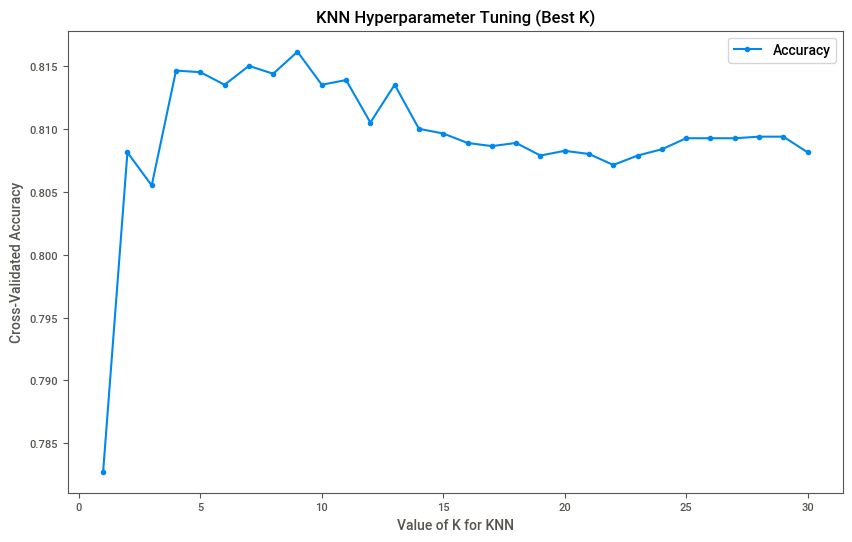

In [26]:
# Plot cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker="o", label="Accuracy")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Hyperparameter Tuning (Best K)")
plt.legend()
plt.show()

In [27]:
best_k = k_range[np.argmax(cv_scores)]
print(f"Best K: {best_k}")

Best K: 9


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the KNN model with the optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_optimal.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)

conf_matrix


array([[1527,   66],
       [ 307,  100]], dtype=int64)

In [30]:
 test_accuracy

0.8135

In [32]:
print("Confusion Matrix with Best K:\n", conf_matrix)
print("Classification Report with Best K:\n", class_report)

Confusion Matrix with Best K:
 [[1527   66]
 [ 307  100]]
Classification Report with Best K:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.60      0.25      0.35       407

    accuracy                           0.81      2000
   macro avg       0.72      0.60      0.62      2000
weighted avg       0.79      0.81      0.78      2000



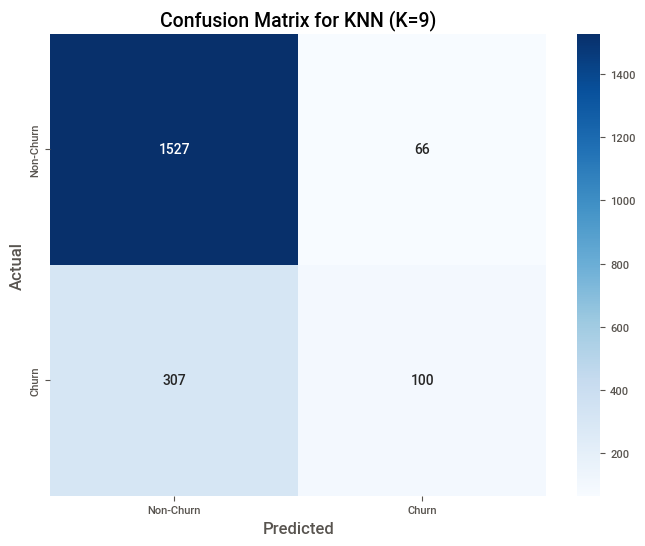

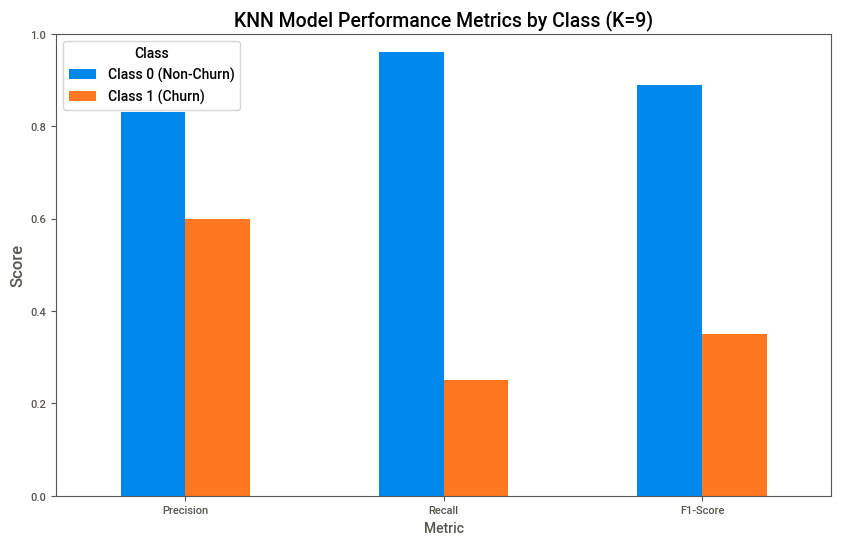

In [33]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for KNN (K=9)', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Plot Precision, Recall, and F1-Score for each class
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0 (Non-Churn)': [0.83, 0.96, 0.89],
    'Class 1 (Churn)': [0.60, 0.25, 0.35]
})

metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('KNN Model Performance Metrics by Class (K=9)', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Class')
plt.show()


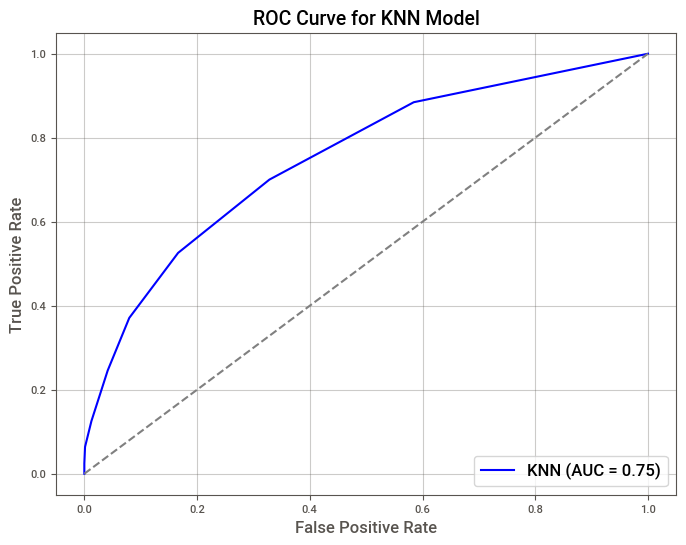

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob = knn_optimal.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under Curve) score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.title('ROC Curve for KNN Model', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [35]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE (Synthetic Minority Oversampling Technique) to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after resampling
balanced_class_distribution = y_resampled.value_counts()
balanced_class_distribution


Exited
1    6370
0    6370
Name: count, dtype: int64

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Timing the training
start_time = time.time()

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


elapsed_time = time.time() - start_time
print(f"The time taken to train the decision Tree model is {elapsed_time} seconds")






The time taken to train the decision Tree model is 0.036536216735839844 seconds


In [52]:
# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)


In [53]:
print("Confusion Matrix of the Decision Tree Model:\n", conf_matrix_dt)
print("Classification Report of the Decision Tree Model:\n", class_report_dt)

Confusion Matrix of the Decision Tree Model:
 [[1358  235]
 [ 198  209]]
Classification Report of the Decision Tree Model:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.47      0.51      0.49       407

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.79      0.78      0.79      2000



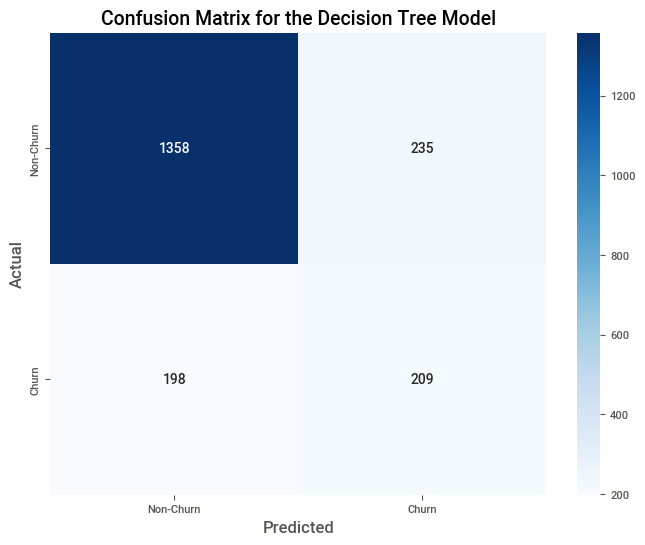

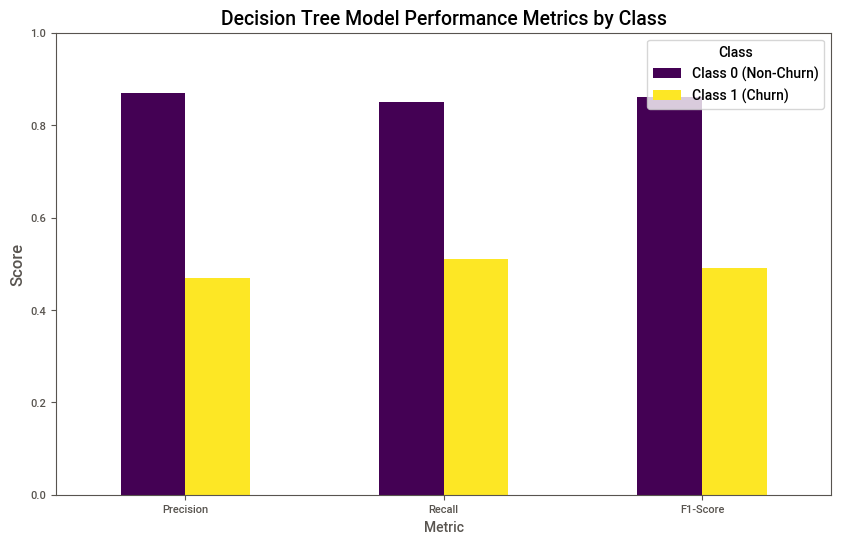

In [54]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Given confusion matrix
conf_matrix_dt = [[1358, 235], [198, 209]]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for the Decision Tree Model', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Metrics for the Decision Tree Model
metrics_df_dt = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0 (Non-Churn)': [0.87, 0.85, 0.86],
    'Class 1 (Churn)': [0.47, 0.51, 0.49]
})

# Plotting Precision, Recall, and F1-Score for each class
metrics_df_dt.set_index('Metric').plot(kind='bar', figsize=(10, 6), rot=0, colormap='viridis')
plt.title('Decision Tree Model Performance Metrics by Class', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.legend(title='Class')
plt.show()



C:\Users\sfaiz\AppData\Local\Temp\ipykernel_276668\920530637.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


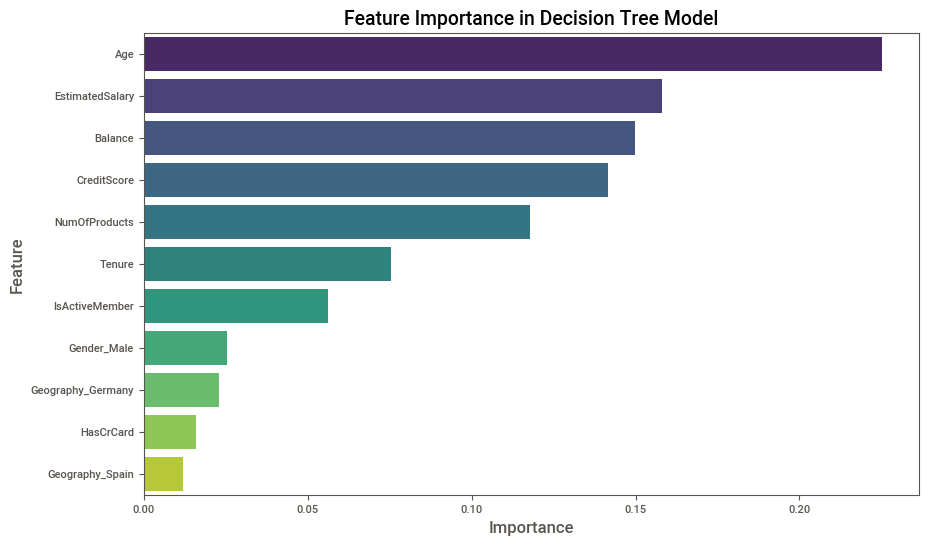

In [55]:
# Extract and visualize feature importance
feature_importances = decision_tree.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Decision Tree Model', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


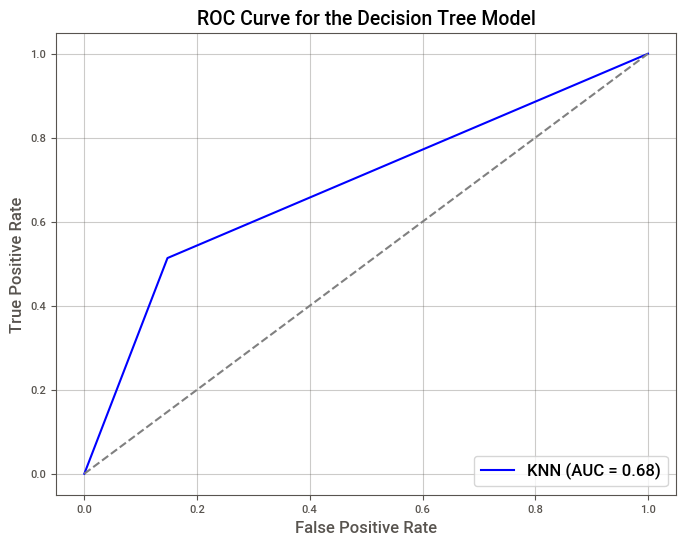

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob = decision_tree.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC (Area Under Curve) score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.title('ROC Curve for the Decision Tree Model', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [64]:
# Initialize the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [65]:
from sklearn.model_selection import GridSearchCV
# Set up the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

In [66]:
# Measure training time
start_train = time.time()
grid_search.fit(X_train, y_train)
elapsed_train = time.time() - start_train

# Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters from GridSearchCV:")
print(best_params)
print(f"Training Time: {elapsed_train:.2f} seconds")

Best Parameters from GridSearchCV:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training Time: 6.18 seconds


In [67]:
# Evaluate the best model
start_pred = time.time()
y_pred = best_model.predict(X_test)
elapsed_pred = time.time() - start_pred

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTuned Decision Tree Model Accuracy: {accuracy:.2f}")
print(f"Prediction Time: {elapsed_pred:.2f} seconds")


Tuned Decision Tree Model Accuracy: 0.86
Prediction Time: 0.00 seconds


In [68]:
# Classification report
print("\nClassification Report of the Hyperparameter tuned Decision Tree Model:")
print(classification_report(y_test, y_pred))


Classification Report of the Hyperparameter tuned Decision Tree Model:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.75      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



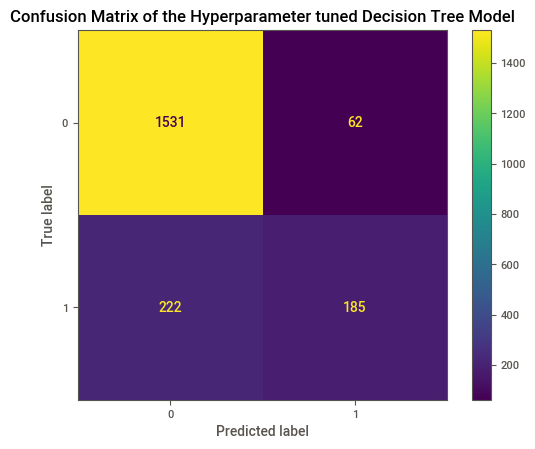

(0.858,
 137.93790245056152,
 array([[1531,   62],
        [ 222,  185]], dtype=int64))

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Simulating `best_model` prediction for demonstration purposes
# Assuming `y_test` and `X_test` exist in context
y_pred = best_model.predict(X_test)
elapsed_pred = time.time() - start_pred

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix of the Hyperparameter tuned Decision Tree Model")
plt.show()

accuracy, elapsed_pred, conf_matrix

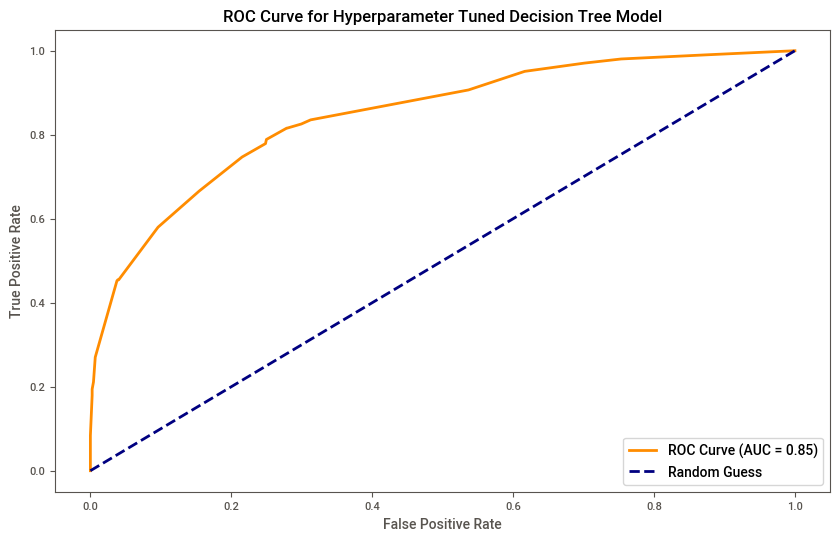

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming the best_model is the hyperparameter tuned Decision Tree model
# and y_test and X_test are available
y_prob = best_model.predict_proba(X_test)[:, 1]  # Get the probability scores for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hyperparameter Tuned Decision Tree Model')
plt.legend(loc="lower right")
plt.show()


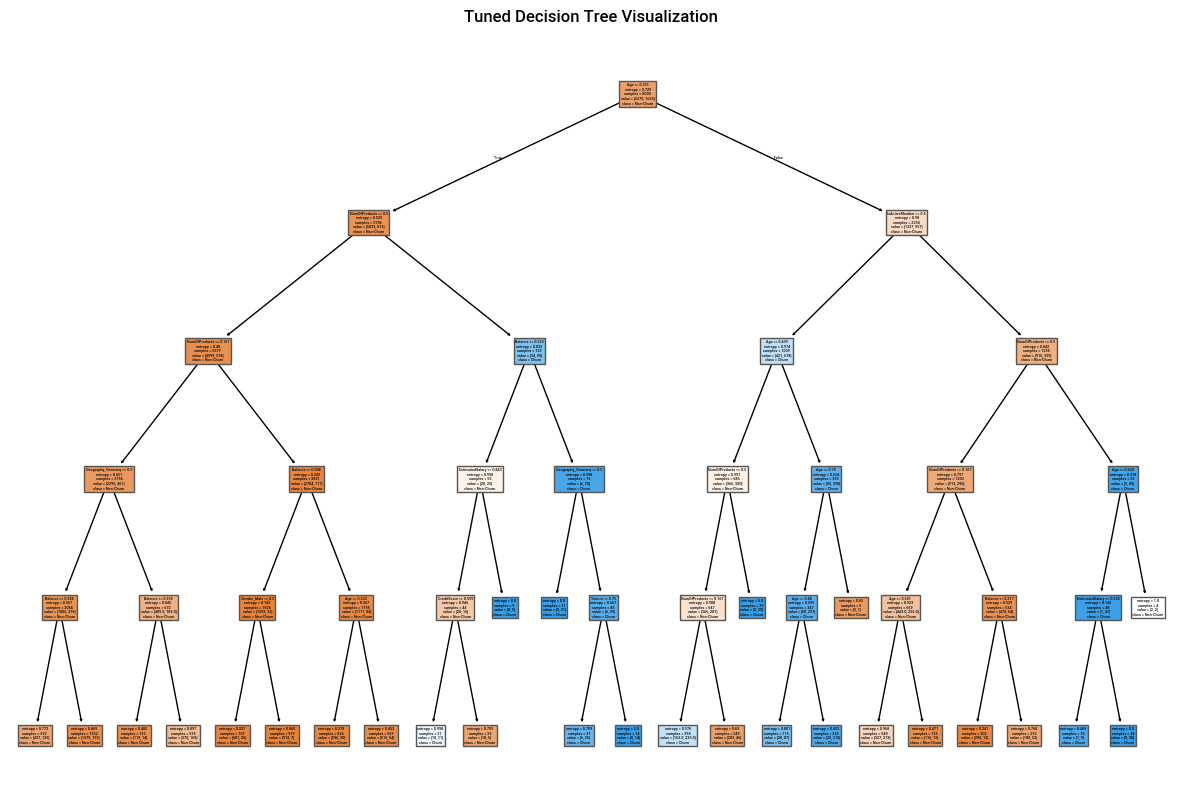

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Use the feature names from the original DataFrame (excluding the target variable 'Exited')
feature_names = churn_cleaned.drop(columns='Exited').columns

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    best_model,  # Ensure this is your trained DecisionTreeClassifier model
    feature_names=feature_names,  # Use feature names from the original dataset
    class_names=['Non-Churn', 'Churn'],  # Class labels (as strings)
    filled=True
)
plt.title("Tuned Decision Tree Visualization")
plt.show()


In [75]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to DOT format
dot_data = export_graphviz(
    best_model,  # Replace with your DecisionTreeClassifier variable
    out_file=None,  # No file output, store in a string
    feature_names=feature_names,  # Feature names from original dataset
    class_names=['Non-Churn', 'Churn'],  # Class names
    filled=True,  # Color nodes by class
    rounded=True,  # Round edges for aesthetics
    special_characters=True  # Support for special characters in labels
)

# Use Graphviz to create and render the tree
graph = graphviz.Source(dot_data)
graph.view()  # This will open the visualization in your default viewer


'Source.gv.pdf'

In [78]:
from sklearn.tree import export_text

# Generate text representation of the tree
tree_text = export_text(best_model, feature_names=list(feature_names))

# Print the text representation
print("\nText Representation of the Decision Tree:")
print(tree_text)



Text Representation of the Decision Tree:
|--- Age <= 0.33
|   |--- NumOfProducts <= 0.50
|   |   |--- NumOfProducts <= 0.17
|   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |--- Balance <= 0.29
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Balance >  0.29
|   |   |   |   |   |--- class: 0
|   |   |   |--- Geography_Germany >  0.50
|   |   |   |   |--- Balance <= 0.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Balance >  0.40
|   |   |   |   |   |--- class: 0
|   |   |--- NumOfProducts >  0.17
|   |   |   |--- Balance <= 0.01
|   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Balance >  0.01
|   |   |   |   |--- Age <= 0.22
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  0.22
|   |   |   |   |   |--- class: 0
|   |--- NumOfProducts >  0.50
|   |   |--- Balance <= 0.22
|   |   |   |--- EstimatedSalary <= 0.84
|   |   |   |   |-

# Pruning

Time elapsed for calculating pruning path: 0.0380 seconds


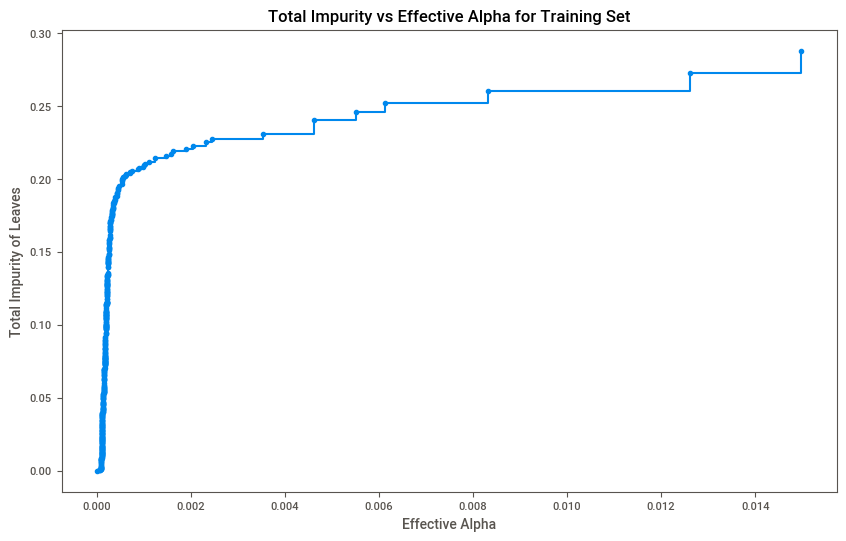

In [79]:
import time
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

# Measure the time for cost complexity pruning path calculation
start_time = time.time()
path = clf.cost_complexity_pruning_path(X_train, y_train)
elapsed_time = time.time() - start_time

# Extract alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Print the time elapsed for pruning path calculation
print(f"Time elapsed for calculating pruning path: {elapsed_time:.4f} seconds")

# Plot Total Impurity vs Effective Alpha
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()


In [80]:
import time

# Create a list to store classifiers
clfs = []

# Measure the time taken for training all models
start_time = time.time()

# Iterate over all ccp_alpha values and train DecisionTreeClassifier for each
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calculate elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print(f"Time elapsed for training all models: {elapsed_time:.4f} seconds")

# Print the number of nodes and the ccp_alpha for the last tree
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)



Time elapsed for training all models: 14.5976 seconds
Number of nodes in the last tree is: 1 with ccp_alpha: 0.036625469267922206


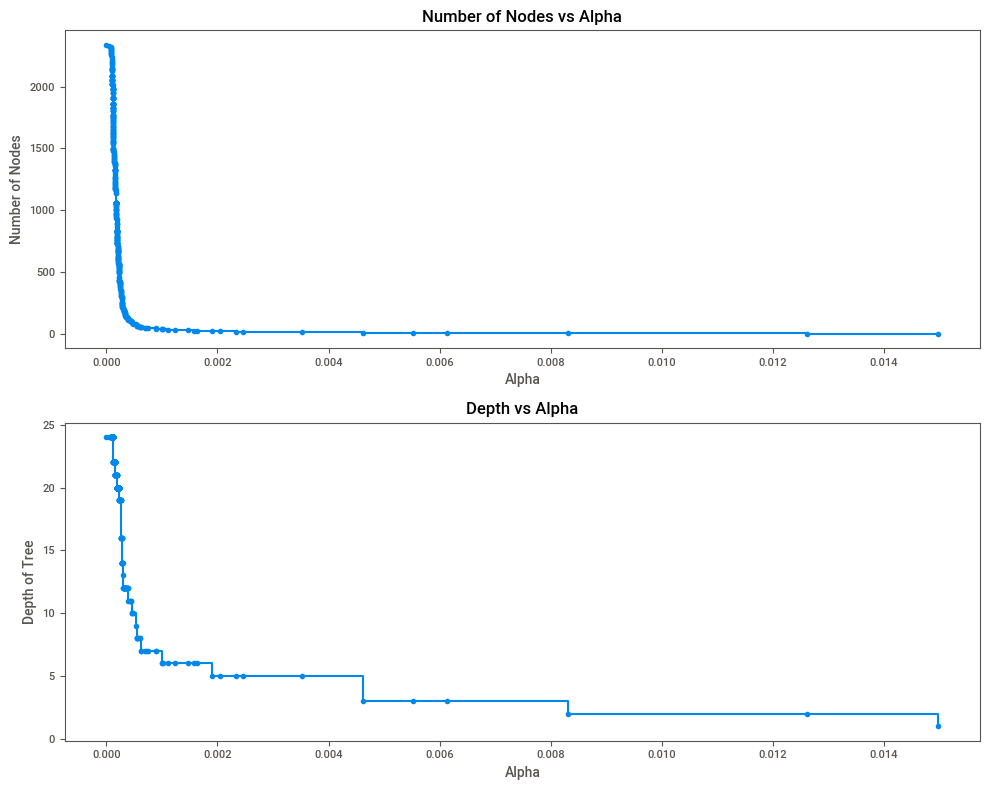

In [81]:
import matplotlib.pyplot as plt

# Remove the last element to avoid the fully pruned tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes and depth for each classifier
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Create subplots for visualization
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot Number of Nodes vs Alpha
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")

# Plot Depth vs Alpha
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")

# Adjust layout for better spacing
fig.tight_layout()

# Show the plots
plt.show()


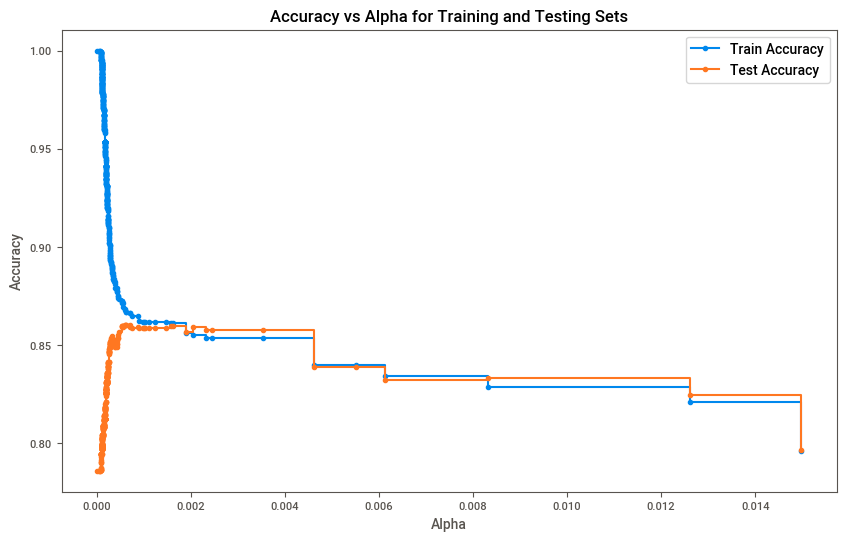

In [82]:
# Compute training and testing accuracy scores for each classifier
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plot Accuracy vs Alpha for training and testing sets
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing Sets")

# Plot training and testing accuracy
ax.plot(ccp_alphas, train_scores, marker="o", label="Train Accuracy", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="Test Accuracy", drawstyle="steps-post")

# Add legend and show plot
ax.legend()
plt.show()


In [91]:
from sklearn.metrics import classification_report
import time

# Set the optimal ccp_alpha value
optimal_ccp_alpha = 0.0018

# Train the pruned DecisionTreeClassifier using the optimal ccp_alpha
pruned_model = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_ccp_alpha)

# Train the model
pruned_model.fit(X_train, y_train)

# Measure prediction time
start_time = time.time()
y_pred3 = pruned_model.predict(X_test)
elapsed_time = time.time() - start_time

# Generate the classification report
report = classification_report(y_test, y_pred3)

# Print results
print(f"Time elapsed for pruned tree to predict on the test set: {elapsed_time:.4f} seconds")
print("\nClassification Report:")
print(report)


Time elapsed for pruned tree to predict on the test set: 0.0010 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.75      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Time elapsed to predict on the test set: 0.0010 seconds

Classification Report of the Pruned Tree:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.75      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



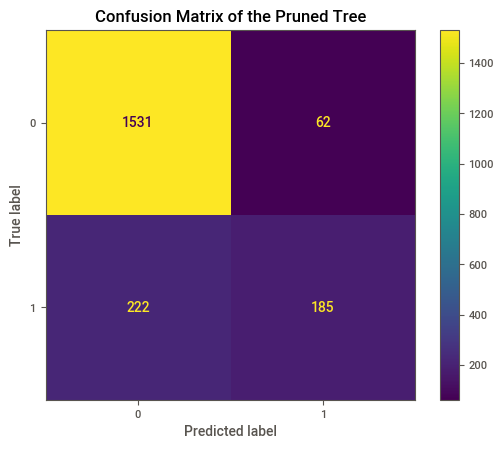

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Time elapsed to predict on the test set: {elapsed_time:.4f} seconds")
print("\nClassification Report of the Pruned Tree:")
print(report)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pruned_model.classes_)
disp.plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix of the Pruned Tree")
plt.show()





Feature Importances:
              Feature  Importance
1                 Age    0.425232
4       NumOfProducts    0.350470
6      IsActiveMember    0.141753
8   Geography_Germany    0.064572
3             Balance    0.017974
0         CreditScore    0.000000
2              Tenure    0.000000
5           HasCrCard    0.000000
7     EstimatedSalary    0.000000
9     Geography_Spain    0.000000
10        Gender_Male    0.000000


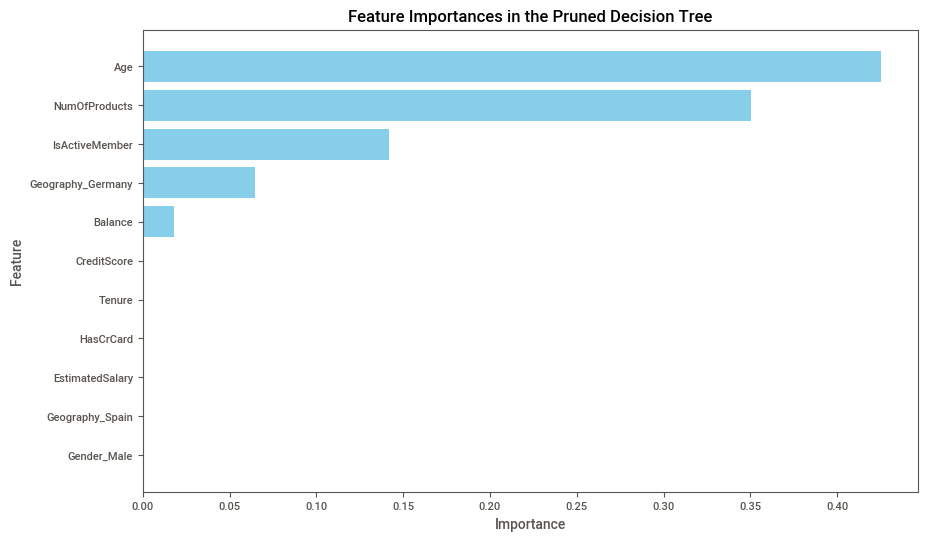

In [95]:
# Retrieve feature importances from the pruned decision tree
feature_importances = pruned_model.feature_importances_

# Create a DataFrame to display feature importances alongside feature names
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Print the feature importance table
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in the Pruned Decision Tree")
plt.gca().invert_yaxis()
plt.show()


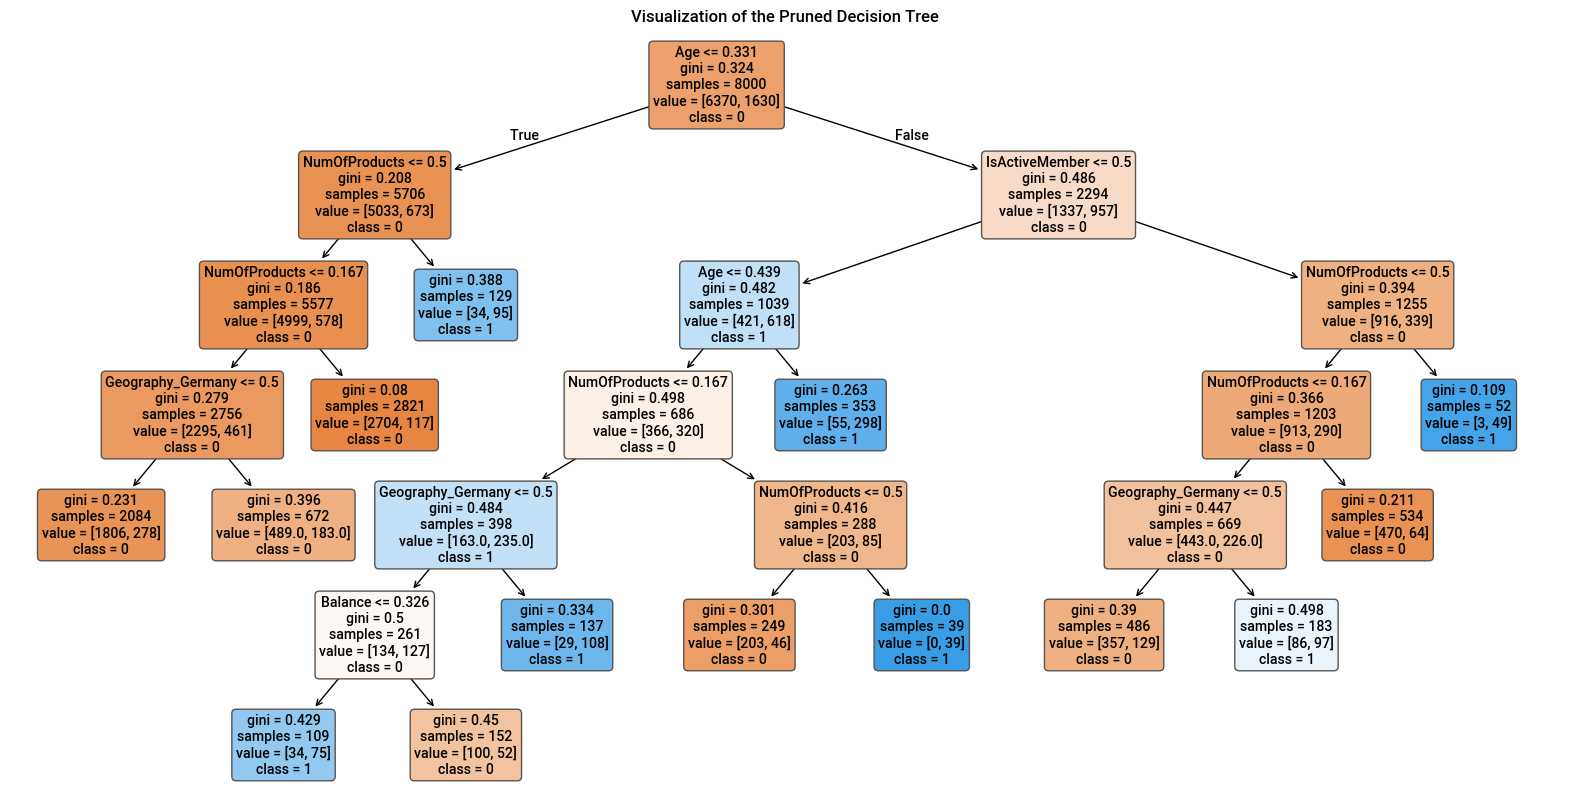

In [96]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    pruned_model,
    feature_names=feature_names,  # Replace with your feature column names
    class_names=[str(cls) for cls in pruned_model.classes_],  # Replace with your class names if applicable
    filled=True,
    rounded=True
)
plt.title("Visualization of the Pruned Decision Tree")
plt.show()


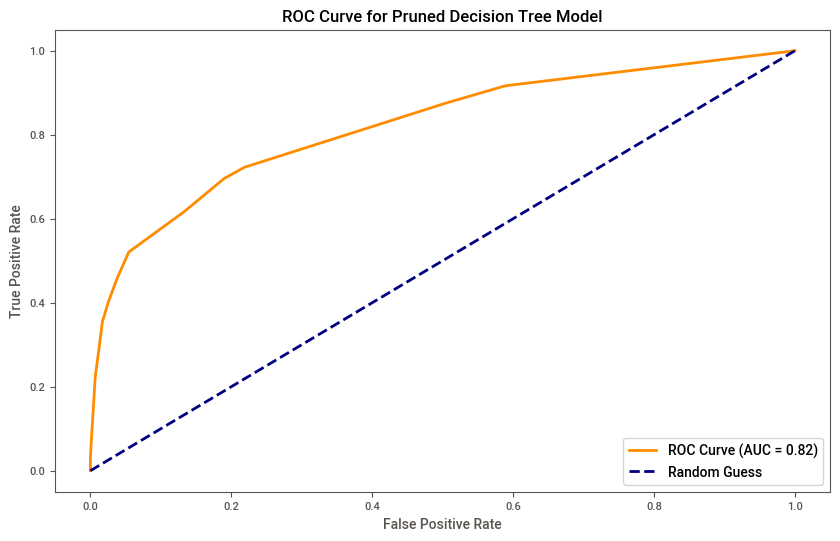

In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming pruned_model is the trained Decision Tree model with optimal ccp_alpha
# Ensure X_test and y_test are defined and available

# Get probability scores for the positive class
y_prob3 = pruned_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class

# Compute ROC curve and AUC
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_prob3)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Pruned Decision Tree Model')
plt.legend(loc="lower right")
plt.show()



## Random Forest Model

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import numpy as np

# Suppress floating-point errors
np.seterr(invalid='ignore')

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2', None]
}

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Measure training time
start_train_time = time.time()
rf_grid_search.fit(X_train, y_train)
elapsed_train_time = time.time() - start_train_time

# Retrieve the best model and its parameters
rf_best_model = rf_grid_search.best_estimator_
best_params = rf_grid_search.best_params_
best_score = rf_grid_search.best_score_

# Measure prediction time
start_pred_time = time.time()
rf_y_pred = rf_best_model.predict(X_test)
elapsed_pred_time = time.time() - start_pred_time

# Evaluate the model
accuracy = accuracy_score(y_test, rf_y_pred)
class_report = classification_report(y_test, rf_y_pred)
conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Output results
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
print(f"Training Time: {elapsed_train_time:.2f} seconds")
print(f"Prediction Time: {elapsed_pred_time:.2f} seconds")
print("\nAccuracy on Test Set:", accuracy)
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.864625
Training Time: 171.06 seconds
Prediction Time: 0.02 seconds

Accuracy on Test Set: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.84      0.45      0.58       407

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.87      0.87      0.85      2000


Confusion Matrix:
 [[1557   36]
 [ 224  183]]


Random Forest - Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest - Best Cross-Validation Accuracy: 0.864625
Random Forest - Training Time: 171.06 seconds
Random Forest - Prediction Time: 0.02 seconds

Random Forest - Accuracy on Test Set: 0.87

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.84      0.45      0.58       407

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.87      0.87      0.85      2000



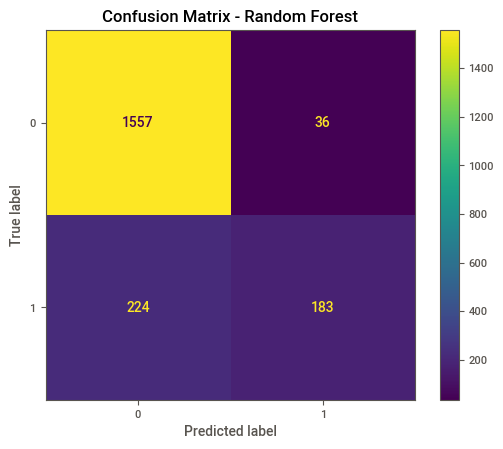

In [103]:
# Output results
print("Random Forest - Best Parameters:", best_params)
print("Random Forest - Best Cross-Validation Accuracy:", best_score)
print(f"Random Forest - Training Time: {elapsed_train_time:.2f} seconds")
print(f"Random Forest - Prediction Time: {elapsed_pred_time:.2f} seconds")
print("\nRandom Forest - Accuracy on Test Set:", accuracy)
print("\nRandom Forest - Classification Report:\n", class_report)


# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_best_model.classes_)
disp.plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

C:\Users\sfaiz\AppData\Local\Temp\ipykernel_276668\3199649379.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_rf_df, palette='viridis')


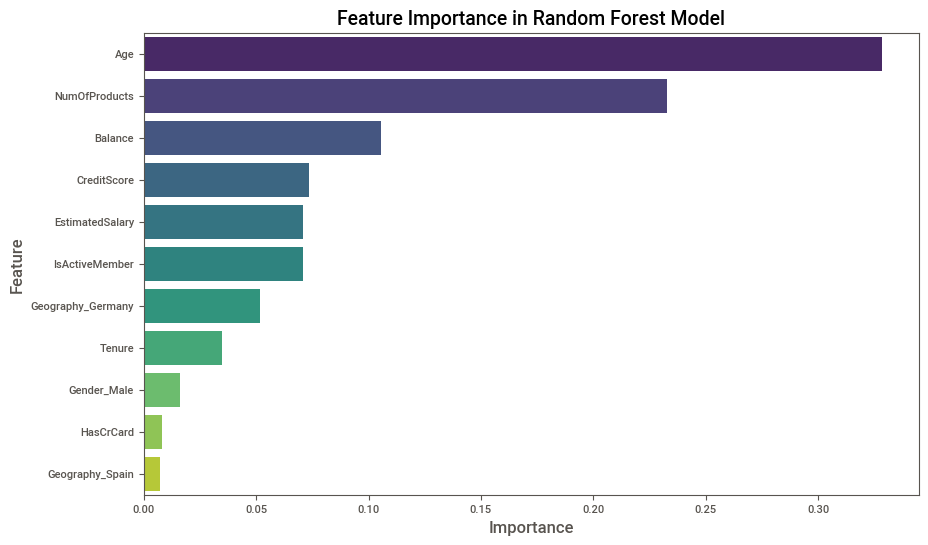

In [109]:
# Extract and visualize feature importance for Random Forest
feature_importances_rf = rf_best_model.feature_importances_

# Create a DataFrame for visualization
importance_rf_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


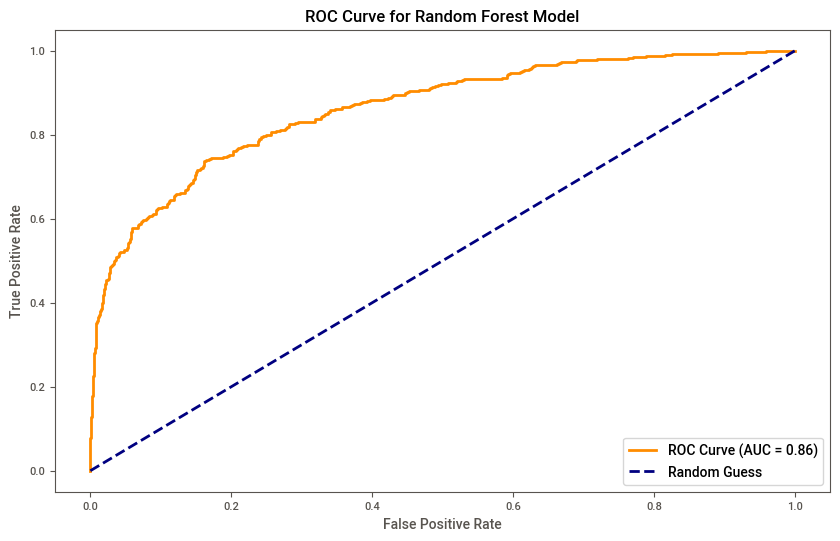

Area Under the Curve (AUC): 0.8622


In [104]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate probability scores for the positive class
rf_y_prob = rf_best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_prob)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc="lower right")
plt.show()

# Print AUC value for reference
print(f"Area Under the Curve (AUC): {rf_roc_auc:.4f}")


# Gradient boosting 

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best Parameters (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy (Gradient Boosting): 0.87
Training Time: 334.9187 seconds
Prediction Time: 0.0029 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.50      0.61       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



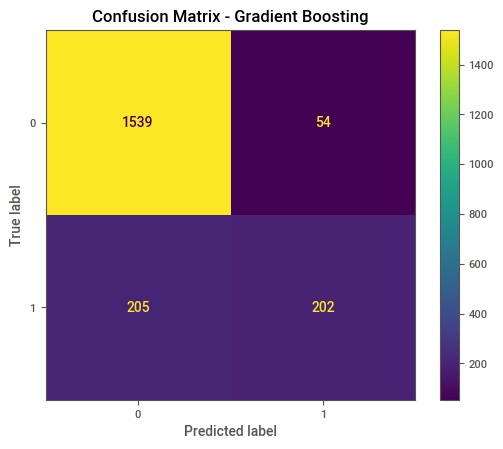

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import time
import matplotlib.pyplot as plt



# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Measure training time
start_train_time = time.time()
gb_grid_search.fit(X_train, y_train)
elapsed_train_time = time.time() - start_train_time

# Retrieve the best model and its parameters
gb_best_model = gb_grid_search.best_estimator_

# Measure prediction time
start_pred_time = time.time()
gb_y_pred = gb_best_model.predict(X_test)
elapsed_pred_time = time.time() - start_pred_time

# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_classification_report = classification_report(y_test, gb_y_pred)

# Generate the confusion matrix
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)

# Print results
print(f"\nBest Parameters (Gradient Boosting): {gb_grid_search.best_params_}")
print(f"Accuracy (Gradient Boosting): {gb_accuracy:.2f}")
print(f"Training Time: {elapsed_train_time:.4f} seconds")
print(f"Prediction Time: {elapsed_pred_time:.4f} seconds")
print("\nClassification Report:")
print(gb_classification_report)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=gb_conf_matrix, display_labels=gb_best_model.classes_)
disp.plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


C:\Users\sfaiz\AppData\Local\Temp\ipykernel_276668\4214320401.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_rf_df, palette='viridis')


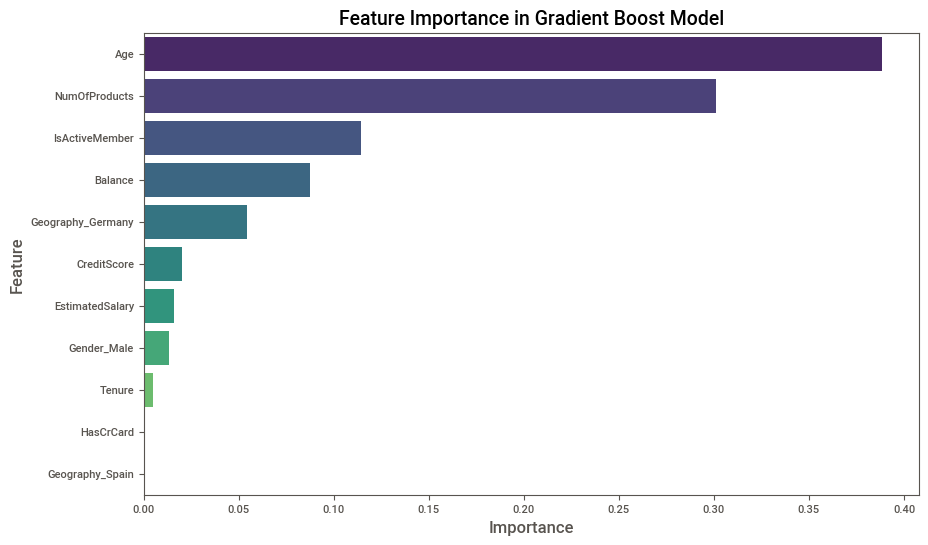

In [110]:
# Extract and visualize feature importance for Random Forest
feature_importances_rf = gb_best_model.feature_importances_

# Create a DataFrame for visualization
importance_rf_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf_df, palette='viridis')
plt.title('Feature Importance in Gradient Boost Model', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


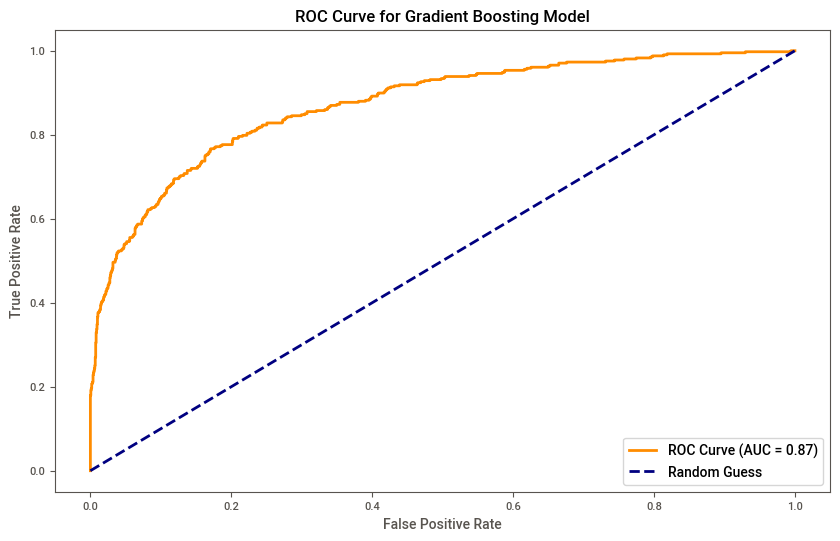

Area Under the Curve (AUC): 0.8716


In [111]:
from sklearn.metrics import roc_curve, auc

# Generate probability scores for the positive class
gb_y_prob = gb_best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_y_prob)
gb_roc_auc = auc(gb_fpr, gb_tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(gb_fpr, gb_tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {gb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Model')
plt.legend(loc="lower right")
plt.show()

# Print AUC value for reference
print(f"Area Under the Curve (AUC): {gb_roc_auc:.4f}")


In [113]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# SVM Models


Training SVM with linear kernel...
SVM with linear kernel - Training Time: 1.94 seconds
SVM with linear kernel - Accuracy: 0.7965
SVM with linear kernel - AUC: 0.7373

Training SVM with rbf kernel...
SVM with rbf kernel - Training Time: 4.40 seconds
SVM with rbf kernel - Accuracy: 0.8475
SVM with rbf kernel - AUC: 0.8152

Training SVM with poly kernel...
SVM with poly kernel - Training Time: 4.16 seconds
SVM with poly kernel - Accuracy: 0.8510
SVM with poly kernel - AUC: 0.8257

Training SVM with sigmoid kernel...
SVM with sigmoid kernel - Training Time: 4.01 seconds
SVM with sigmoid kernel - Accuracy: 0.7055
SVM with sigmoid kernel - AUC: 0.5849


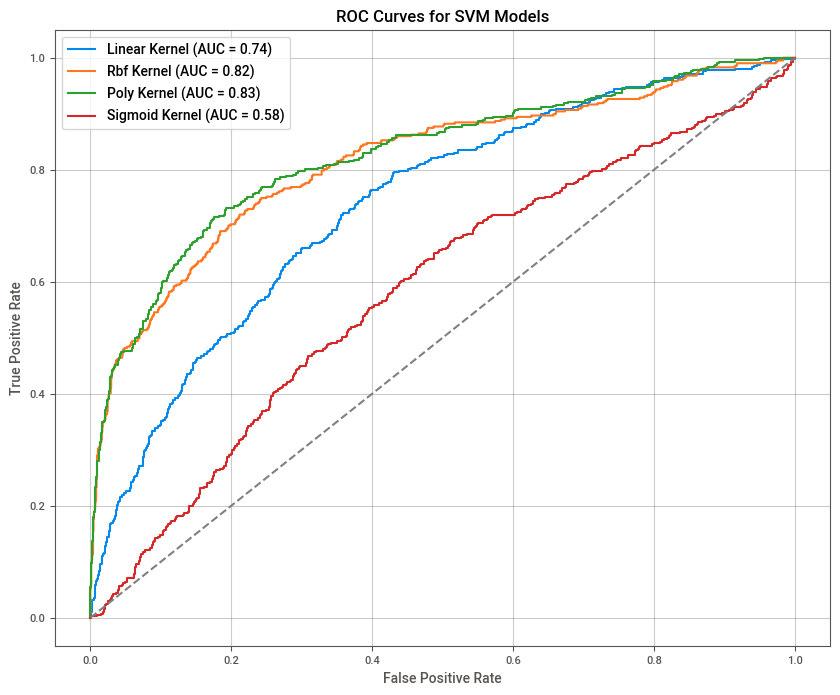

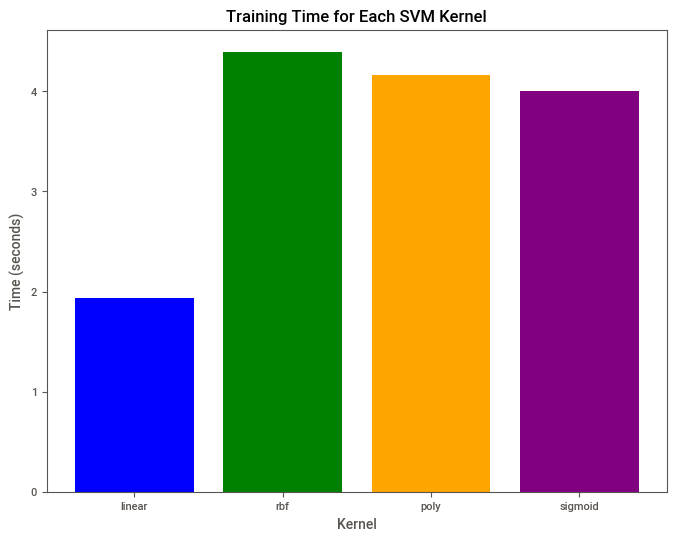

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time

# List of kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Initialize dictionaries to store results
train_times = {}
roc_curves = {}
conf_matrices = {}
class_reports = {}
accuracies = {}

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    
    # Train SVM
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    start_train_time = time.time()
    svm.fit(X_train, y_train)
    elapsed_train_time = time.time() - start_train_time
    train_times[kernel] = elapsed_train_time

    # Make predictions
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_curves[kernel] = (fpr, tpr, roc_auc)

    # Store evaluation metrics
    conf_matrices[kernel] = confusion_matrix(y_test, y_pred)
    class_reports[kernel] = classification_report(y_test, y_pred)
    accuracies[kernel] = accuracy_score(y_test, y_pred)

    # Output results
    print(f"SVM with {kernel} kernel - Training Time: {elapsed_train_time:.2f} seconds")
    print(f"SVM with {kernel} kernel - Accuracy: {accuracies[kernel]:.4f}")
    print(f"SVM with {kernel} kernel - AUC: {roc_auc:.4f}")

# Plot ROC curves for all kernels
plt.figure(figsize=(10, 8))
for kernel, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{kernel.capitalize()} Kernel (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("ROC Curves for SVM Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Visualize Training Times
plt.figure(figsize=(8, 6))
plt.bar(train_times.keys(), train_times.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title("Training Time for Each SVM Kernel")
plt.xlabel("Kernel")
plt.ylabel("Time (seconds)")
plt.show()


# Neural network model

In [115]:
# Packages needed for neural network
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize
import pandas as pd

In [116]:
# Hyperparameter grid for MLPClassifier
# Define the MLPClassifier model
mlp = MLPClassifier(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100,), (50,), (100,100), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'alpha': [0.0001, 0.001],
    'max_iter': [500]
}

# Neural network training 

In [117]:
# Perform grid search
start_time = time.time()
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
end_time = time.time()

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Time Elapsed for Grid Search: {end_time - start_time:.2f} seconds")

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
Time Elapsed for Grid Search: 140.82 seconds


In [118]:
# Best model
best_mlp = grid_search.best_estimator_

Time elapsed for prediction and evaluation: 0.0030 seconds


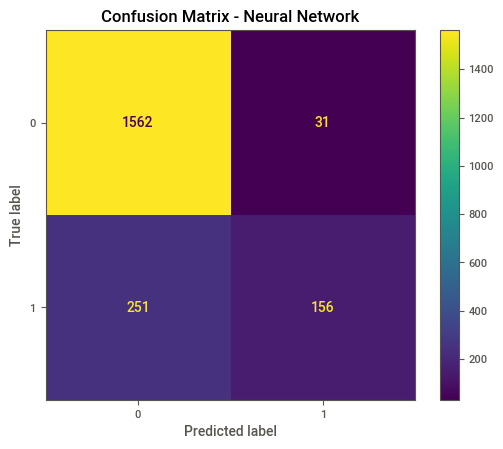

Classification Report with Best MLP:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.83      0.38      0.53       407

    accuracy                           0.86      2000
   macro avg       0.85      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000



In [121]:
# Measure the time for prediction and evaluation
start_time = time.time()
y_pred_best = best_mlp.predict(X_test)
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print results and elapsed time
print(f"Time elapsed for prediction and evaluation: {elapsed_time:.4f} seconds")


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_best), display_labels=gb_best_model.classes_)
disp.plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix - Neural Network")
plt.show()
print("Classification Report with Best MLP:\n", classification_report(y_test, y_pred_best))